In [1]:
# analysis
import pandas as pd
import numpy as np
import skgstat as skg
from scipy.stats import skew, kurtosis
import random
import itertools

# plotting
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import cmocean

fmt = '.jpg'

In [2]:
data = np.load('data.npz')

xx = data['xx']
yy = data['yy']
sgs = data['sgs']
#dcgan = data['dcgan']
diffusion = data['diffusion']
dcgan = data['gan']

print(xx.shape, sgs.shape, dcgan.shape, diffusion.shape)

(256, 256) (100, 256, 256) (100, 256, 256) (100, 256, 256)


In [3]:
sgs_mean = np.mean(sgs, axis=0)
sgs_var = np.var(sgs, axis=0)
sgs_skew = skew(sgs, axis=0)
sgs_kurt = kurtosis(sgs, axis=0)

dcgan_mean = np.mean(dcgan, axis=0)
dcgan_var = np.var(dcgan, axis=0)
dcgan_skew = skew(dcgan, axis=0)
dcgan_kurt = kurtosis(dcgan, axis=0)

diff_mean = np.mean(diffusion, axis=0)
diff_var = np.var(diffusion, axis=0)
diff_skew = skew(diffusion, axis=0)
diff_kurt = kurtosis(diffusion, axis=0)

C:\Users\mjfie\AppData\Local\Temp\ipykernel_27140\2523285098.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sgs_skew = skew(sgs, axis=0)
C:\Users\mjfie\AppData\Local\Temp\ipykernel_27140\2523285098.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sgs_kurt = kurtosis(sgs, axis=0)


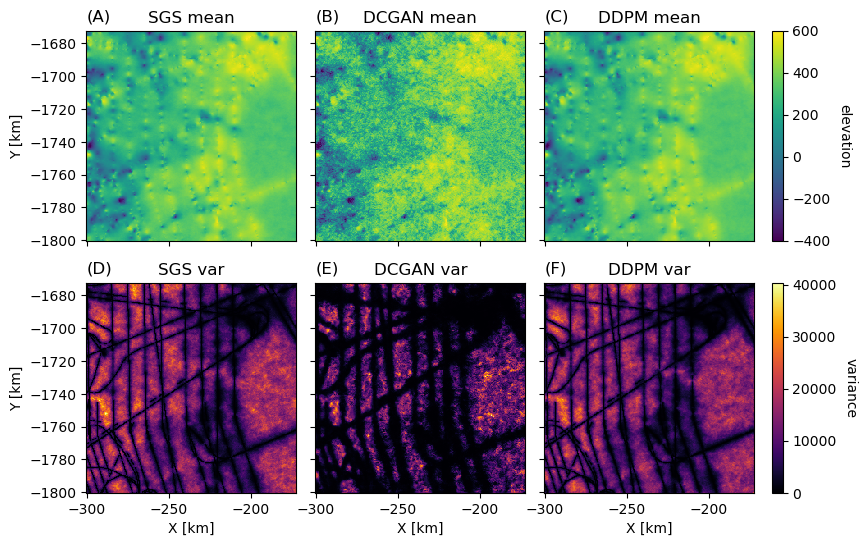

In [4]:
plots = [
    sgs_mean,
    dcgan_mean,
    diff_mean,
    sgs_var,
    dcgan_var,
    diff_var
]

titles = [
    'SGS mean',
    'DCGAN mean',
    'DDPM mean',
    'SGS var',
    'DCGAN var',
    'DDPM var'
]

var_vmax = np.max(np.var(sgs, axis=0))

fig = plt.figure(figsize=(9,6))
spec = GridSpec(ncols=4, nrows=2, figure=fig, width_ratios=[1, 1, 1, 0.05], hspace=0.2, wspace=0.1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, (ax, plot, title) in enumerate(zip(axs, plots, titles)):
    if i < 3:
        im1 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=-400, vmax=600, cmap='viridis')
    else:
        im2 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=0, vmax=var_vmax, cmap='inferno')
        ax.set_xlabel('X [km]')
    ax.set_title(title)
    ax.axis('scaled')

ax1.set_ylabel('Y [km]')
ax4.set_ylabel('Y [km]')

for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels([])
for ax in [ax2, ax3, ax5, ax6]:
    ax.set_yticklabels([])

cax = fig.add_subplot(spec[0, 3])
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('elevation', rotation=270, labelpad=15)

cax = fig.add_subplot(spec[1, 3])
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('variance', rotation=270, labelpad=15)

labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']

for ax, label in zip([ax1, ax2, ax3, ax4, ax5, ax6], labels):
    ax.text(-0.0, 1.10, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/mean_var_grid'+fmt, dpi=300, bbox_inches='tight')
plt.show()

In [5]:
variograms = np.load('variograms.npz')
sgs_vars = variograms['sgs']
diff_vars = variograms['diffusion']
dcgan_vars = variograms['dcgan']
gan_vars = variograms['gan']
bins = variograms['bins']

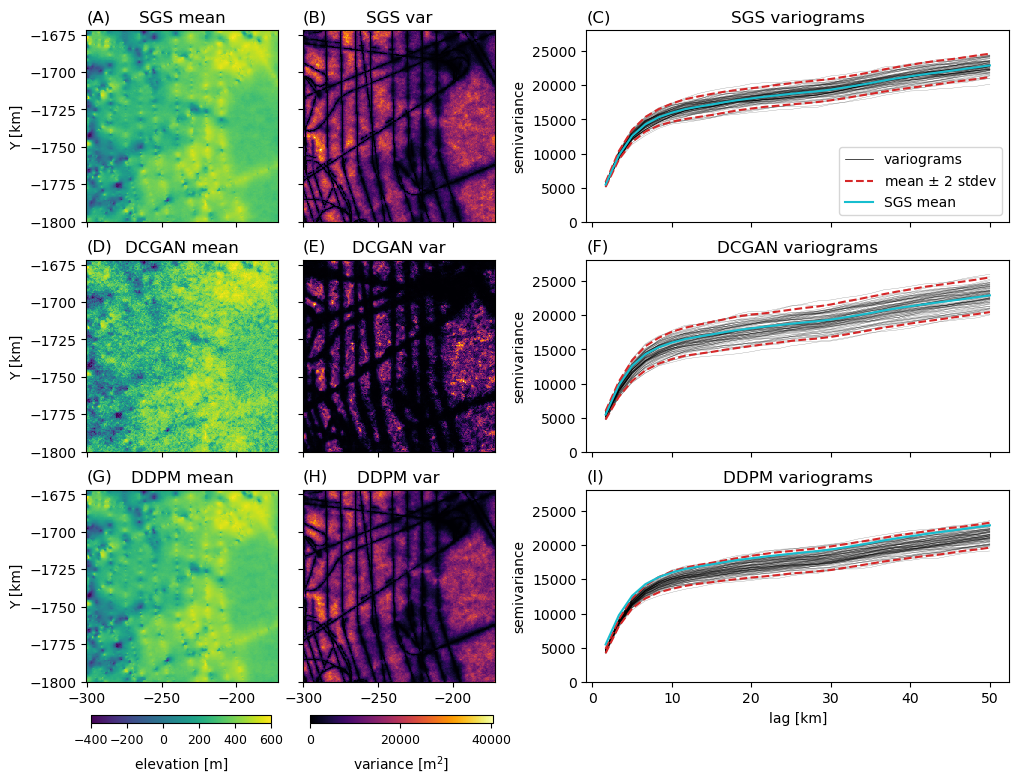

In [13]:
fig = plt.figure(figsize=(12,9))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 0.013], hspace=0.1, wspace=0.2)
gs1 = GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[0,0], wspace=0.05)
gs2 = GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,1])

ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs2[0])
ax4 = fig.add_subplot(gs1[1, 0])
ax5 = fig.add_subplot(gs1[1, 1])
ax6 = fig.add_subplot(gs2[1])
ax7 = fig.add_subplot(gs1[2, 0])
ax8 = fig.add_subplot(gs1[2, 1])
ax9 = fig.add_subplot(gs2[2])

axs = [ax1, ax2, ax4, ax5, ax7, ax8]

plots = [
    sgs_mean,
    sgs_var,
    dcgan_mean,
    dcgan_var,
    diff_mean,
    diff_var
]

titles = [
    'SGS mean',
    'SGS var',
    'DCGAN mean',
    'DCGAN var',
    'DDPM mean',
    'DDPM var'
]

var_vmax = np.max(np.var(sgs, axis=0))

for i, (ax, plot, title) in enumerate(zip(axs, plots, titles)):
    if i%2==0:
        im1 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=-400, vmax=600, cmap='viridis')
    else:
        im2 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=0, vmax=var_vmax, cmap='inferno')
    ax.set_title(title)
    ax.axis('scaled')

ax3.plot(bins/1000, sgs_vars[0,:], '-', c='k', alpha=1, linewidth=0.5, label='variograms')

alpha = 0.5
linewidth = 0.2

for i in range(100):
    ax3.plot(bins/1000, sgs_vars[i,:], '-', c='k', alpha=alpha, linewidth=linewidth)
    ax3.set_title('SGS variograms')

    ax6.plot(bins/1000, gan_vars[i,:], '-', c='k', alpha=alpha, linewidth=linewidth)
    ax6.set_title('DCGAN variograms')

    ax9.plot(bins/1000, diff_vars[i,:], '-', c= 'k', alpha=alpha, linewidth=linewidth)
    ax9.set_title('DDPM variograms')

ax3.plot(bins/1000, np.mean(sgs_vars, axis=0)+2*np.std(sgs_vars, axis=0), '--', c='tab:red', label=r'mean $\pm$ 2 stdev')
ax3.plot(bins/1000, np.mean(sgs_vars, axis=0)-2*np.std(sgs_vars, axis=0), '--', c='tab:red')
ax6.plot(bins/1000, np.mean(gan_vars, axis=0)+2*np.std(gan_vars, axis=0), '--', c='tab:red')
ax6.plot(bins/1000, np.mean(gan_vars, axis=0)-2*np.std(gan_vars, axis=0), '--', c='tab:red')
ax9.plot(bins/1000, np.mean(diff_vars, axis=0)+2*np.std(diff_vars, axis=0), '--', c='tab:red')
ax9.plot(bins/1000, np.mean(diff_vars, axis=0)-2*np.std(diff_vars, axis=0), '--', c='tab:red')

mean_color = 'tab:cyan'
ax3.plot(bins/1000, np.mean(sgs_vars, axis=0), '-', c=mean_color, linewidth=1.5, label='SGS mean')
ax6.plot(bins/1000, np.mean(sgs_vars, axis=0), '-', c=mean_color, linewidth=1.5, label='SGS mean')
ax9.plot(bins/1000, np.mean(sgs_vars, axis=0), '-', c=mean_color, linewidth=1.5, label='SGS mean')

ax3.legend(loc='lower right')
# ax6.legend(loc='lower right')
# ax9.legend(loc='lower right')

ax1.set_ylabel('Y [km]')
ax4.set_ylabel('Y [km]')
ax7.set_ylabel('Y [km]')

for ax in [ax3, ax6, ax9]:
    ax.set_ylabel('semivariance')

ax9.set_xlabel('lag [km]')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticklabels([])
for ax in [ax2, ax5, ax8]:
    ax.set_yticklabels([])

for ax in [ax3, ax6, ax9]:
    ax.set_ylim([0,28e3])

gs3 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1, 0])
gs4 = GridSpecFromSubplotSpec(1, 64, subplot_spec=gs3[0])
cax = fig.add_subplot(gs4[4:67])
cbar = plt.colorbar(im1, cax=cax, use_gridspec=True, location='bottom', ticks=[-400, -200, 0, 200, 400, 600])
cbar.set_label('elevation [m]', labelpad=8)
cbar.ax.tick_params(labelsize=9)

gs6 = GridSpecFromSubplotSpec(1, 64, subplot_spec=gs3[1])
cax = fig.add_subplot(gs6[0:61])
cbar = plt.colorbar(im2, cax=cax, location ='bottom')
cbar.set_label(r'variance [m$^2$]', labelpad=5)
cbar.ax.tick_params(labelsize=9)

labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)', '(I)']

for ax, label in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9], labels):
    ax.text(-0.0, 1.11, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/mean_var_vario_grid'+fmt, dpi=300, bbox_inches='tight')
plt.show()

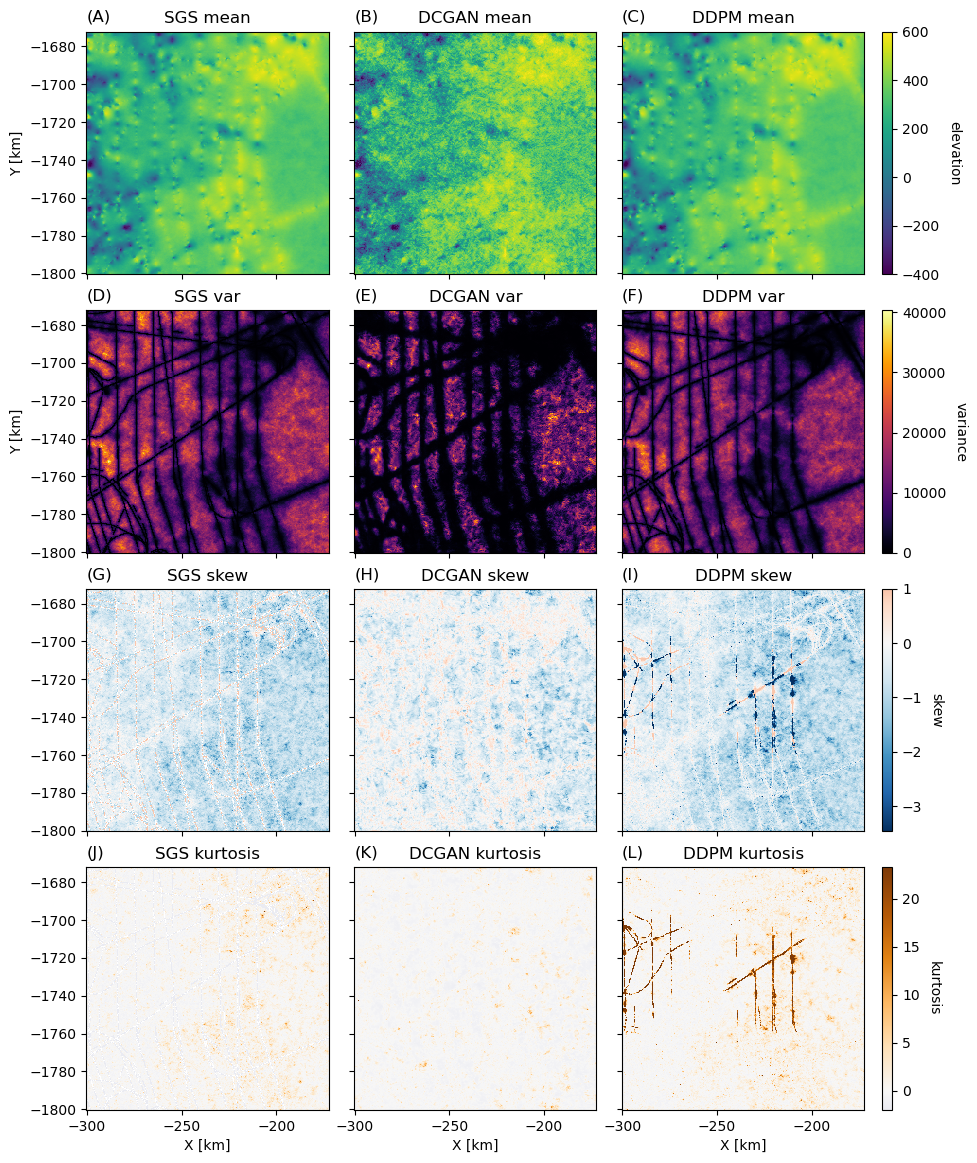

In [7]:
plots = [
    sgs_mean,
    dcgan_mean,
    diff_mean,
    sgs_var,
    dcgan_var,
    diff_var,
    sgs_skew,
    dcgan_skew,
    diff_skew,
    sgs_kurt,
    dcgan_kurt,
    diff_kurt
]

titles = [
    'SGS mean',
    'DCGAN mean',
    'DDPM mean',
    'SGS var',
    'DCGAN var',
    'DDPM var',
    'SGS skew',
    'DCGAN skew',
    'DDPM skew',
    'SGS kurtosis',
    'DCGAN kurtosis',
    'DDPM kurtosis'
]

var_vmax = np.nanmax(np.var(sgs, axis=0))
skew_vmax = np.nanmax(sgs_skew)
skew_vmin = np.nanmin(sgs_skew)
kurt_vmax = np.nanmax(sgs_kurt)
kurt_vmin = np.nanmin(sgs_kurt)

skew_norm = colors.TwoSlopeNorm(vmin=skew_vmin, vcenter=0., vmax=skew_vmax)
kurt_norm = colors.TwoSlopeNorm(vmin=kurt_vmin, vcenter=0., vmax=kurt_vmax)

skew_cmap = cmocean.tools.crop(plt.cm.RdBu_r, skew_vmin, skew_vmax, 0)
kurt_cmap = cmocean.tools.crop(plt.cm.PuOr_r, kurt_vmin, kurt_vmax, 0)

fig = plt.figure(figsize=(10.5,14))
spec = GridSpec(ncols=4, nrows=4, figure=fig, width_ratios=[1, 1, 1, 0.04], hspace=0.15, wspace=0.05)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0])
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])
ax7 = fig.add_subplot(spec[2, 0])
ax8 = fig.add_subplot(spec[2, 1])
ax9 = fig.add_subplot(spec[2, 2])
ax10 = fig.add_subplot(spec[3, 0])
ax11 = fig.add_subplot(spec[3, 1])
ax12 = fig.add_subplot(spec[3, 2])
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i, (ax, plot, title) in enumerate(zip(axs, plots, titles)):
    if i < 3:
        im1 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=-400, vmax=600, cmap='viridis')
    elif i < 6:
        im2 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=0, vmax=var_vmax, cmap='inferno')
    elif i < 9:
        im3 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=skew_vmin, vmax=skew_vmax, cmap=skew_cmap)
    else:
        im4 = ax.pcolormesh(xx/1000, yy/1000, plot, vmin=kurt_vmin, vmax=kurt_vmax, cmap=kurt_cmap)
        ax.set_xlabel('X [km]')
    ax.set_title(title)
    ax.axis('scaled')

ax1.set_ylabel('Y [km]')
ax4.set_ylabel('Y [km]')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.set_xticklabels([])
for ax in [ax2, ax3, ax5, ax6, ax8, ax9, ax11, ax12]:
    ax.set_yticklabels([])

cax = fig.add_subplot(spec[0, 3])
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('elevation', rotation=270, labelpad=15)

cax = fig.add_subplot(spec[1, 3])
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('variance', rotation=270, labelpad=15)

cax = fig.add_subplot(spec[2, 3])
cbar = plt.colorbar(im3, cax=cax)
cbar.set_label('skew', rotation=270, labelpad=15)

cax = fig.add_subplot(spec[3, 3])
cbar = plt.colorbar(im4, cax=cax)
cbar.set_label('kurtosis', rotation=270, labelpad=15)

labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)', '(I)', '(J)', '(K)', '(L)']

for ax, label in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12], labels):
    ax.text(-0.0, 1.09, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/mean_var_skew_kurt_grid'+fmt, dpi=300, bbox_inches='tight')
plt.show()

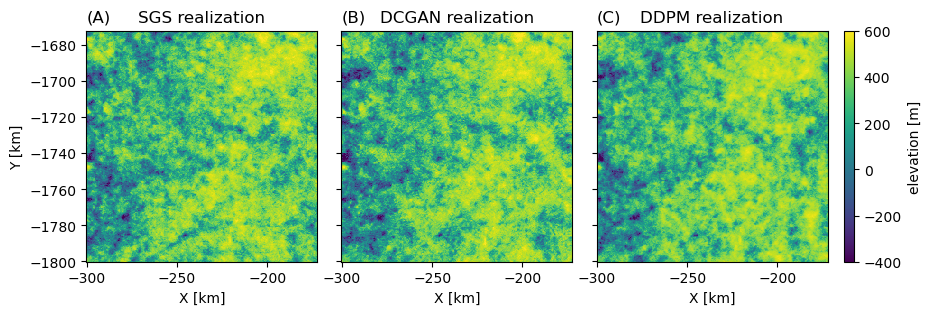

In [8]:
fig = plt.figure(figsize=(10, 3))
spec = GridSpec(ncols=4, nrows=1, figure=fig, width_ratios=[1, 1, 1, 0.04], wspace=0.05)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
cax = fig.add_subplot(spec[0, 3])

ax = ax1
ax.pcolormesh(xx/1000, yy/1000, sgs[0], vmin=-400, vmax=600)
ax.axis('scaled')
ax.set_title('SGS realization')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')

ax = ax2
ax.pcolormesh(xx/1000, yy/1000, dcgan[0], vmin=-400, vmax=600)
ax.axis('scaled')
ax.set_title('DCGAN realization')
ax.set_xlabel('X [km]')
ax.set_yticklabels([])

ax = ax3
im = ax.pcolormesh(xx/1000, yy/1000, diffusion[0], vmin=-400, vmax=600)
ax.axis('scaled')
ax.set_title('DDPM realization')
ax.set_xlabel('X [km]')
ax.set_yticklabels([])

plt.colorbar(im, cax=cax, label='elevation [m]')

labels = ['(A)', '(B)', '(C)']

for ax, label in zip([ax1, ax2, ax3], labels):
    ax.text(-0.0, 1.094, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/realizations'+fmt, dpi=300, bbox_inches='tight')
plt.show()

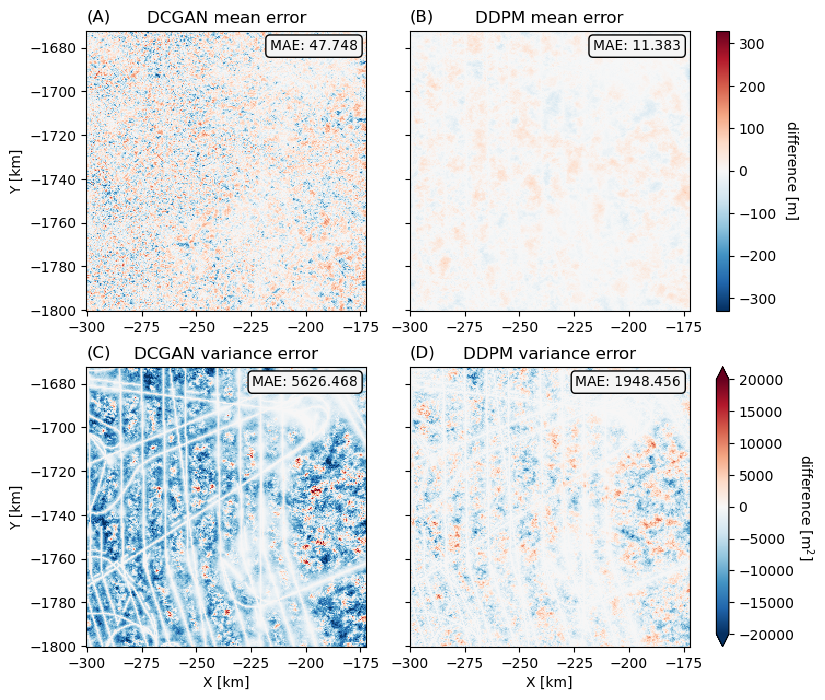

In [9]:
dcgan_mean_err = dcgan_mean - sgs_mean
diff_mean_err = diff_mean - sgs_mean
dcgan_var_err = dcgan_var - sgs_var
diff_var_err = diff_var - sgs_var

plots = [
    dcgan_mean_err,
    diff_mean_err,
    dcgan_var_err,
    diff_var_err
]

dmean_vmax = np.max(np.abs(np.array([plots[0], plots[1]])))
dvar_vmax = np.max(np.abs(np.array([plots[2], plots[3]])))

titles = [
    'DCGAN mean error',
    'DDPM mean error',
    'DCGAN variance error',
    'DDPM variance error'
]

fig = plt.figure(figsize=(8.5, 8))
spec = GridSpec(ncols=3, nrows=2, figure=fig, width_ratios=[1, 1, 0.04], wspace=0.05)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])

bbox = dict(boxstyle='round', fc='whitesmoke')

for i, (ax, plot, title) in enumerate(zip([ax1, ax2, ax3, ax4], plots, titles)):
    if i<2:
        im1 = ax.pcolormesh(xx/1000, yy/1000, plot, cmap='RdBu_r', vmin=-dmean_vmax, vmax=dmean_vmax)
    else:
        im2 = ax.pcolormesh(xx/1000, yy/1000, plot, cmap='RdBu_r', vmin=-20e3, vmax=20e3)
    ax.axis('scaled')
    ax.annotate(f'MAE: {np.mean(np.abs(plot)):.3f}', (0.97, 0.97), xycoords=ax.transAxes, ha='right', va='top', bbox=bbox)
    ax.set_title(title)
        
for ax in [ax1, ax3]:
    ax.set_ylabel('Y [km]')

for ax in [ax2, ax4]:
    ax.set_yticklabels([])

for ax in [ax3, ax4]:
    ax.set_xlabel('X [km]')

cax = fig.add_subplot(spec[0, 2])
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('difference [m]', rotation=270, labelpad=15)

cax = fig.add_subplot(spec[1, 2])
cbar = plt.colorbar(im2, cax=cax, extend='both')
cbar.set_label(r'difference [m$^2$]', rotation=270, labelpad=15)

labels = ['(A)', '(B)', '(C)', '(D)']

for ax, label in zip([ax1, ax2, ax3, ax4], labels):
    ax.text(-0.0, 1.075, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/mean_var_error'+fmt, dpi=300, bbox_inches='tight')
plt.show()

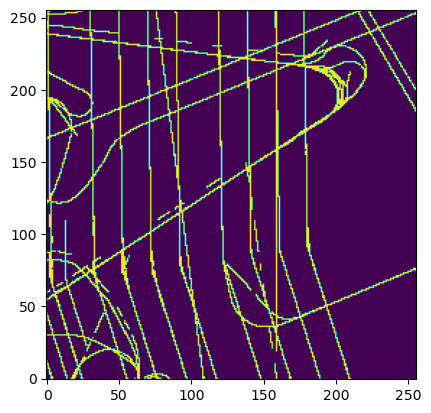

In [10]:
cond_msk = np.isclose(sgs_var, np.zeros(xx.shape))

plt.imshow(cond_msk, origin='lower')
plt.show()

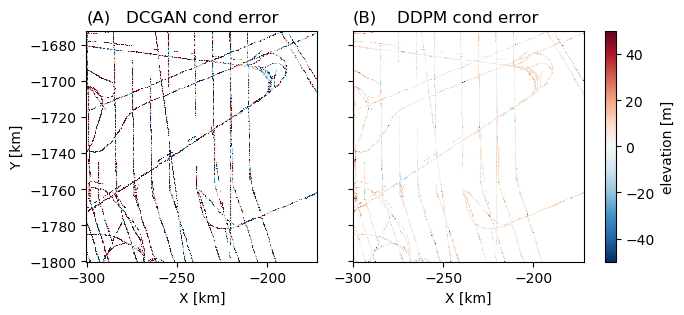

In [11]:
vmin = -50
vmax = 50

fig = plt.figure(figsize=(7, 3))
spec = GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[1, 1, 0.04], wspace=0.05)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
cax = fig.add_subplot(spec[0, 2])

ax = ax1
ax.pcolormesh(xx/1000, yy/1000, np.where(cond_msk, sgs[0]-dcgan[0], np.nan), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax.axis('scaled')
ax.set_title('DCGAN cond error')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')

ax = ax2
im = ax.pcolormesh(xx/1000, yy/1000, np.where(cond_msk, sgs[0]-diffusion[0], np.nan), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax.axis('scaled')
ax.set_title('DDPM cond error')
ax.set_xlabel('X [km]')
ax.set_yticklabels([])

plt.colorbar(im, cax=cax, label='elevation [m]')

labels = ['(A)', '(B)']

for ax, label in zip([ax1, ax2, ax3], labels):
    ax.text(-0.0, 1.094, label, color='k', fontsize=12, ha='left', va='top', transform=ax.transAxes)

plt.savefig('Plots/cond_error'+fmt, dpi=300, bbox_inches='tight')
plt.show()